### Exercici 1
#### Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [2]:
import numpy as np #library for scientific computing
import pandas as pd #library for dataframes 
import matplotlib.pyplot as plt #graphic library
import seaborn as sns #advanced graphic library based on matplotlib
import statistics #library for statistics
import warnings #library to manage warnings
import scipy #library with algorithms for statistics and scientific computing

warnings.filterwarnings('ignore')

In [3]:
#we obtain the dataset from Kaggle (https://www.kaggle.com/rajeevw/ufcdata)
#the dataset is about UFC-Fight historical data from 1993 to 2021. UFC is a Mixed Martial Arts USA league.

df_ufc = pd.read_csv('ufc.csv') 

df_ufc.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


In [4]:
print("Shape (rows x columns): " + str(df_ufc.shape))
print("Dimensions: " + str(df_ufc.ndim))
print("Columns: " + str(df_ufc.columns))
print('Nan values per variable:\n' + str(df_ufc.isna().sum()))

Shape (rows x columns): (6012, 144)
Dimensions: 2
Columns: Index(['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'Winner',
       'title_bout', 'weight_class', 'B_avg_KD', 'B_avg_opp_KD',
       ...
       'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO', 'R_win_by_Submission',
       'R_win_by_TKO_Doctor_Stoppage', 'R_Stance', 'R_Height_cms',
       'R_Reach_cms', 'R_Weight_lbs', 'B_age', 'R_age'],
      dtype='object', length=144)
Nan values per variable:
R_fighter         0
B_fighter         0
Referee          32
date              0
location          0
               ... 
R_Height_cms      4
R_Reach_cms     406
R_Weight_lbs      2
B_age           172
R_age            63
Length: 144, dtype: int64


In [5]:
print("Types of objects:\n" + str(df_ufc.dtypes))
#types of each variable

Types of objects:
R_fighter        object
B_fighter        object
Referee          object
date             object
location         object
                 ...   
R_Height_cms    float64
R_Reach_cms     float64
R_Weight_lbs    float64
B_age           float64
R_age           float64
Length: 144, dtype: object


Explanation of the dataframe:

Each observation represents a fight.

An R or a B before the description is refering to Red (R) or Blue (B) corner. 
Red corner usually is for the favorite fighter or with the most recognized name.
Blue corner usually is for the underdog or the less recognized name

The T-score is=-1.833, and the p-value is=0.083
the probability to obtain this T-score is 8.258 %
which is bigger than alpha value (5%), then we fail to reject the null hypothesis


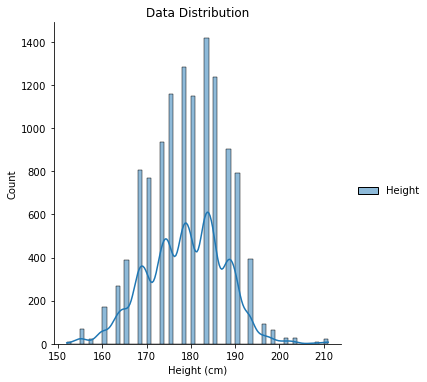

In [25]:
#hypothesis 0 or null hypothesis (H0): A statement about a population parameter. It has always de equal sign.
#hypothesis 1 or alternative hypothesis (H1): A statement that contradicts the null hypothesis. It must be <,> or not equal tan HO. 

#test statistic: random variable calculated from sample data and used in hypothesis test to calculate p-value.
#there are 4 main test statistics: Z-Test, T-Test, ANOVA, Chi-square test
#most common methods are T-score and Z-score for normal distributions

#z-score (also called standard score): it is a measure of how many standard 
#deviations below or above the population mean a raw score is
# z = (x-u)/o where x=raw score, u=population mean and o=population standard deviation

#when to use T-Test (Student T test): sample size below 30; unknown population standard deviation
#when to use Z-Test: sample size above 30; known population standard deviation

#p-value (or calculated probability): probability of obtaining the observed results of a test by chance
#if p-value <= alpha (aka significance level) : significant result, reject null hypothesis
#if p-value > alpha : not significant result, fail to reject the null hypothesis

#steps to calculate to perform an Hypothesis testing:
#1.-State your null and alternative hypothesis
#2.-Set significance level or alpha
#3.-Collect sample data and calculate sample statistics
#4.-Calculate the p-value given sample statistics
#5.-Reject or do not reject the null hypothesis

#we want to check the hypothesis that says most common height to be a fighter is 183 cm
#hypothesis 0: height = 183
#hypothesis 1: height < 183

#selecting data from fighters height
red_height = df_ufc['R_Height_cms']
blue_height = df_ufc['B_Height_cms']
Height = pd.concat([red_height, blue_height], ignore_index=True, sort=False)

#removing nan data and rounding
Height = Height.dropna()
Height = Height.round(decimals=0)

#creating a dataframe
df_Height = pd.DataFrame(Height, columns=['Height'])

#plotting data to check if it is a normal distribution
fig = sns.displot(data=df_Height, kde=True, binwidth=1)
fig.set(title='Data Distribution', xlabel='Height (cm)', ylabel='Count')
#we can observe that some heights are not represented, probably because incorrect conversion from feet and inches to cm

#taking a sample (20 observations)
df_Height_sample = df_Height.sample(20)

#applying T-Test to obtain p-value
stat, pval = scipy.stats.ttest_1samp(df_Height_sample, 183)
pct = round(float(pval*100),3)

print('The T-score is=%.3f, and the p-value is=%.3f' % (stat,pval))

#according to p value, if alpha value is 0.05 or 5%

print('the probability to obtain this T-score is',pct,'%')
if pval < 0.05:    
   print("which is smaller than alpha (5%), then we reject the null hypothesis")
else:
  print("which is bigger than alpha value (5%), then we fail to reject the null hypothesis")

### Exercici 2
#### Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

The T-score is=-1.363, and the p-value is=0.189
the probability to obtain this T-score is 18.876 %
which is bigger than alpha value (5%), then we fail to reject the null hypothesis


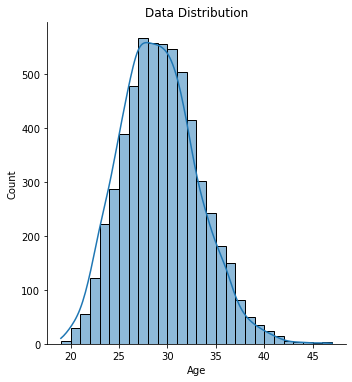

In [22]:
#we want to check the hypothesis that says that are more winners at 30 years old
#hypothesis 0: winners = yes + age = 30 
#hypothesis 1: winners = yes + age < 30

#selecting data from only winners and their ages
df_redwinner = df_ufc[df_ufc.Winner == 'Red']['R_age']
df_bluewinner = df_ufc[df_ufc.Winner == 'Blue']['B_age']
df_winners = pd.concat([df_redwinner, df_bluewinner], ignore_index=True, sort=False)

#removing nan data
df_winners = df_winners.dropna()

#plotting data to check if it is a normal distribution
fig = sns.displot(data=df_winners, kde=True, binwidth=1)
fig.set(title='Data Distribution', xlabel='Age', ylabel='Count')

#taking a sample (20 observations)
df_winsample = df_winners.sample(20)

#applying T-Test to obtain p-value
stat, pval = scipy.stats.ttest_1samp(df_winsample, 30)
pct = round(float(pval*100),3)

print('The T-score is=%.3f, and the p-value is=%.3f' % (stat,pval))

#according to p value, if alpha value is 0.05 or 5%

print('the probability to obtain this T-score is',pct,'%')
if pval < 0.05:    
   print("which is smaller than alpha (5%), then we reject the null hypothesis")
else:
  print("which is bigger than alpha value (5%), then we fail to reject the null hypothesis")

### Exercici 3
#### Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

The T-score is=0.474, and the p-value is=0.641
the probability to obtain this T-score is 64.097 %
which is bigger than alpha value (5%), then we fail to reject the null hypothesis


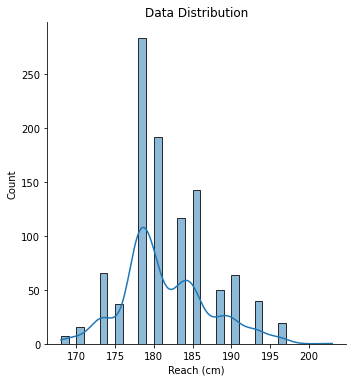

In [21]:
#we want to check the hypothesis that fighters from lightweight category and reach 179 are best fighters 
#hypothesis 0: category = lightweight winners = yes reach = 179
#hypothesis 1: category = lightweight winners = yes reach > 179

#selecting data from winners from category lightweight
df_redwinlight = df_ufc[(df_ufc.Winner == 'Red')&(df_ufc.weight_class == 'Lightweight')]
df_bluewinlight = df_ufc[(df_ufc.Winner == 'Blue')&(df_ufc.weight_class == 'Lightweight')]
df_winlight = pd.concat([df_redwinlight['R_Reach_cms'], df_bluewinlight['B_Reach_cms']], ignore_index=True, sort=False)

#removing nan data and rounding
df_winlight = df_winlight.dropna()
df_winlight = df_winlight.round(decimals=0)

#plotting data to check if it is a normal distribution
fig = sns.displot(data=df_winlight, kde=True, binwidth=1)
fig.set(title='Data Distribution', xlabel='Reach (cm)', ylabel='Count')
#we can observe that some reachs are not represented, probably because incorrect conversion from feet and inches to cm

#sampling (20 observations)
df_winlightsample = df_winlight.sample(20)

#applying T-Test to obtain p-value
stat, pval = scipy.stats.ttest_1samp(df_winlightsample, 179)
pct = round(float(pval*100),3)

print('The T-score is=%.3f, and the p-value is=%.3f' % (stat,pval))

#according to p value, if alpha value is 0.05 or 5%

print('the probability to obtain this T-score is',pct,'%')
if pval < 0.05:    
   print("which is smaller than alpha (5%), then we reject the null hypothesis")
else:
  print("which is bigger than alpha value (5%), then we fail to reject the null hypothesis")